# Assignment 1 - renewables
## Task 1
### Task 1 a: Import pandas under the alias pd, and matplotlib like in the tutorials

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Additionally importing packages
import numpy as np
from collections import OrderedDict

# Answers are printed out by print statement or by calling variables (leading to printing the results as well in Jupyter)
# For answers for the timeseries a DataFrame will be created and data is attached with distinctive columnnames. 
# First three rows shall be sufficient (df.head(3)) to check validity. Please reach out to me via ISIS if more Data is required!

### Task b Reading file to pandas DataFrame (assumtion, wind_speed is in m/s)

In [28]:
wdf = pd.read_csv("https://tubcloud.tu-berlin.de/s/DbDZ7KCtoRAFpyS/download/wind-speeds.csv", index_col = "time")
wdf.head(3)

wind_speed
time                           
2019-01-01 00:00:00       7.885
2019-01-01 01:00:00       8.786
2019-01-01 02:00:00       9.390

### Task c Conver to Windspeeds to hubheight

In [29]:
# Old Data at 10m height is overwritten
wdf.loc[:, "wind_speed"] = wdf.wind_speed * (80/10)**(1/7)
wdf.head(3)

wind_speed
time                           
2019-01-01 00:00:00   10.612423
2019-01-01 01:00:00   11.825079
2019-01-01 02:00:00   12.638003

### Task d Convert Windspeeds to electical poweroutput in MW for both Windturbines

In [30]:
# Assumtion "4-6" includes 4 but exludes 6 ([4,6[)

# Defining power curves for both wind turbines:#
Vestas_pc = OrderedDict({0:0,
                  4:0.2,
                  6:0.5,
                  8:1.4,
                  10:2.6,
                  12:3,
                  14:3,
                  16:3
                  })
Enercon_pc = OrderedDict({0:0,
                  4:0.1,
                  6:0.3,
                  8:0.8,
                  10:1.6,
                  12:2.2,
                  14:2.7,
                  16:3
                  })


def wind_speed_to_power(wind_speed: float, power_curve: dict, cut_off_speed: float) -> float:
    """
    Taking wind speeds and converting it to MW electical output
    Power
    """
    # Iterating thorugh every key in the power curve dict. Power Curve should be ordered 
    keys = power_curve.keys()
    output = 0
    for power_trigger in power_curve:
        if wind_speed>cut_off_speed:
            break
        if wind_speed > power_trigger:
            pass
        else:
            break
        output = power_curve[power_trigger]
    return output
    
# Example calculation for the Vestas Turbine and 10 m/s wind speed:
wind_speed_to_power(wind_speed = 10, power_curve = Vestas_pc, cut_off_speed = 25)

1.4

In [31]:
# Task e Convert the full Timeseries Wind speeds to a Timeseries with Power

wdf["vestas"] = wdf["wind_speed"].apply(wind_speed_to_power, args=(Vestas_pc, 25))
wdf["enercon"] = wdf["wind_speed"].apply(wind_speed_to_power, args=(Enercon_pc, 28))
wdf.head(3)

wind_speed  vestas  enercon
time                                            
2019-01-01 00:00:00   10.612423     2.6      1.6
2019-01-01 01:00:00   11.825079     2.6      1.6
2019-01-01 02:00:00   12.638003     3.0      2.2

In [32]:
# Task f which Turbine yields the most electic energy thoughout the year
maximum_output = max({"vestas": wdf.vestas.sum(), "enercon": wdf.enercon.sum()})
print("The Maximum out put of both winturbines is generated by", maximum_output, "at", round(max(wdf.vestas.sum(),wdf.enercon.sum()),3),"MWH and with a margin of", round(max(wdf.vestas.sum(),wdf.enercon.sum())-min(wdf.vestas.sum(),wdf.enercon.sum()),3), "MWH")

The Maximum out put of both winturbines is generated by vestas at 10169.2 MWH and with a margin of 3817.8 MWH


In [33]:
# Task g Normalise PowerOutput by Capacity

wdf["vestas_normalised"] = wdf["vestas"]/3
wdf["enercon_normalised"] = wdf["enercon"]/3

print("The Normalised poweroutput for the Windturbines are:")
wdf.head(3)

The Normalised poweroutput for the Windturbines are:


wind_speed  vestas  enercon  vestas_normalised  \
time                                                                  
2019-01-01 00:00:00   10.612423     2.6      1.6           0.866667   
2019-01-01 01:00:00   11.825079     2.6      1.6           0.866667   
2019-01-01 02:00:00   12.638003     3.0      2.2           1.000000   

                     enercon_normalised  
time                                     
2019-01-01 00:00:00            0.533333  
2019-01-01 01:00:00            0.533333  
2019-01-01 02:00:00            0.733333

### Task h Anual mean of the capacity factor is 0.386956 for the Vestas Turbine and 0.241682 for the Enercon turbine.


In [34]:
wdf.describe()
# And the mean is: 
wdf.describe().vestas_normalised["mean"]

0.3869558599695586

### Task i share of time the Windturbines do not produce

In [35]:
vestas_0 = wdf["vestas_normalised"].value_counts()[0]/wdf["vestas_normalised"].value_counts().sum()
enercon_0 = wdf["enercon_normalised"].value_counts()[0]/wdf["enercon_normalised"].value_counts().sum()
print("The Vestas turbine does not produce Energy for",round(vestas_0*100,3), "% of the year")
print("while the Enercon turbine does not produce Energy for", round(enercon_0*100,3), "% of the year")
print("It is the same for both windturbines because both have the same cut in wind speed")

The Vestas turbine does not produce Energy for 3.231 % of the year
while the Enercon turbine does not produce Energy for 3.231 % of the year
It is the same for both windturbines because both have the same cut in wind speed


### Task j share of time the Windturbines do produce with maximum/rated capacity

In [36]:
vestas_r = wdf["vestas_normalised"].value_counts()[1]/wdf["vestas_normalised"].value_counts().sum()
enercon_r = wdf["enercon_normalised"].value_counts()[1]/wdf["enercon_normalised"].value_counts().sum()
print("The Vestas turbine is working at rated capacity for",round(vestas_r*100,3), "% of the year")
print("while the Enercon turbine is working at rated capacity for", round(enercon_r*100,3), "% of the year")

The Vestas turbine is working at rated capacity for 6.404 % of the year
while the Enercon turbine is working at rated capacity for 0.571 % of the year


### Task  k is cut off speed reached?


<AxesSubplot: xlabel='time'>

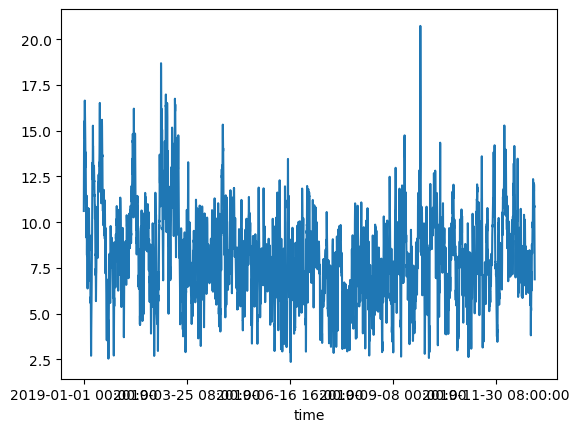

In [37]:
wdf["wind_speed"].plot()
# The cut off speed is never reached as visible in the plot below windspeeds above 25 m/s are never reached during the Time
# Therefore the Windturbines do not shut down


### Task l: Plot the capacity factor time series for the full year using matplotlib. Include axis labels!

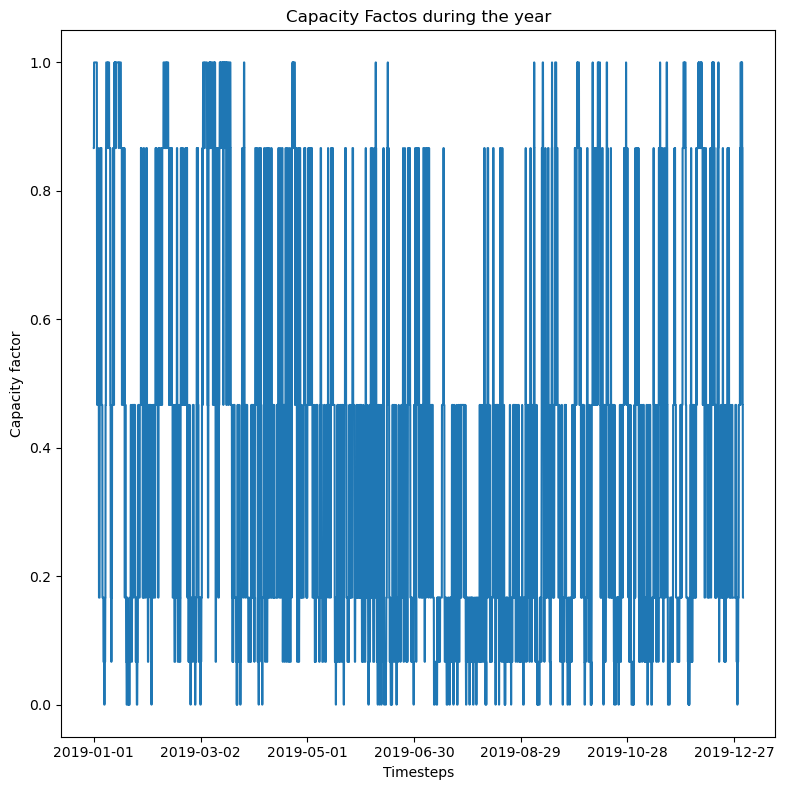

In [38]:

fig, ax = plt.subplots(figsize = (8,8))
x = wdf.index
x = pd.to_datetime(x)
y = wdf.vestas_normalised
ax.plot(x, y)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Capacity factor')
ax.set_title('Capacity Factos during the year')
ax.set_xticks(np.arange(x[0], x[-1], pd.Timedelta(value= 60, unit="days")))

# squeeze everything in
plt.tight_layout()
plt.show()


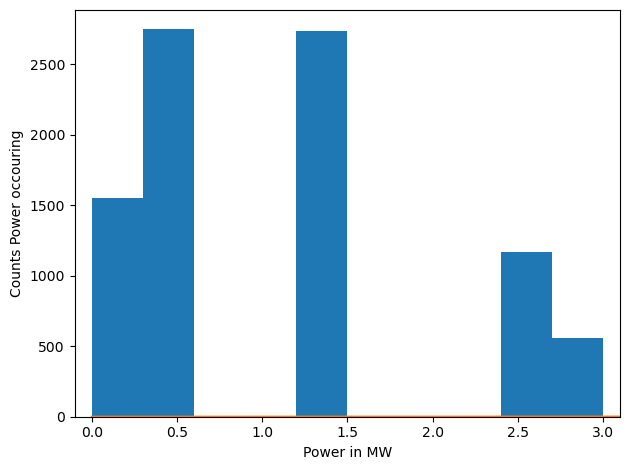

In [39]:
n, bins, patches= plt.hist(x = wdf["vestas"].values)
plt.ylabel("Counts Power occouring")
plt.xlabel('Power in MW')
plt.axis(xmin = -0.1, xmax=3.1)
plt.tight_layout()
plt.plot(bins)



# Task m: Looking at the plot, what would you improve
# about the conversion of wind speeds to capacity factors?

# The Capacity factor caluculation should not be discrete but with a continous
# progress vs the Windspeed at hubheight. 


## Task 2

In [40]:


import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Additionally importing packages
import numpy as np
from collections import OrderedDict
from sklearn.linear_model import LinearRegression
from numpy.fft import fft
import scipy

# Answers are printed out by print statement or by calling variables (leading to printing the results as well in Jupyter)
# For answers for the timeseries a DataFrame will be created and data is attached with distinctive columnnames. 
# First three rows shall be sufficient (df.head(3)) to check validity. Please reach out to me via ISIS if more Data is required!

In [41]:
df = pd.read_csv("https://tubcloud.tu-berlin.de/s/nwCrNLrtL6LAN3W/download/time-series-lecture-2.csv", index_col = "Unnamed: 0", parse_dates = True)

### Task a What are the average, minimum and maximum values?

In [42]:
print("The average values are:")
df.describe().loc["mean", :]

The average values are:


load [GW]         54.736992
onwind [pu]        0.205556
offwind [pu]       0.362993
solar [pu]         0.122621
prices [€/MWh]    31.835717
Name: mean, dtype: float64

### Task b Find the timestamps where data on prices is missing.

In [43]:
df["prices [€/MWh]"].isnull()
# Timesteps where pricedata is None:
# Note that not all timessteps are visible on the print. 

2015-01-01 00:00:00     True
2015-01-01 01:00:00     True
2015-01-01 02:00:00     True
2015-01-01 03:00:00     True
2015-01-01 04:00:00     True
                       ...  
2015-12-31 19:00:00    False
2015-12-31 20:00:00    False
2015-12-31 21:00:00    False
2015-12-31 22:00:00    False
2015-12-31 23:00:00    False
Name: prices [€/MWh], Length: 8760, dtype: bool

### Task c: Fill up the missing data with the prices observed one week ahead.

In [44]:
for idate, i in zip(df["prices [€/MWh]"].isnull().index, df["prices [€/MWh]"].isnull()):
    if i:
        df.loc[idate, "prices [€/MWh]"] = df.loc[idate+pd.Timedelta("7days"), "prices [€/MWh]"] 
# Check if all Data is complete now (8760 Data points necessary for the complete year):
df.count()
# Complete!

load [GW]         8760
onwind [pu]       8760
offwind [pu]      8760
solar [pu]        8760
prices [€/MWh]    8760
dtype: int64

### Task d: Plot the time series for the full year.

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

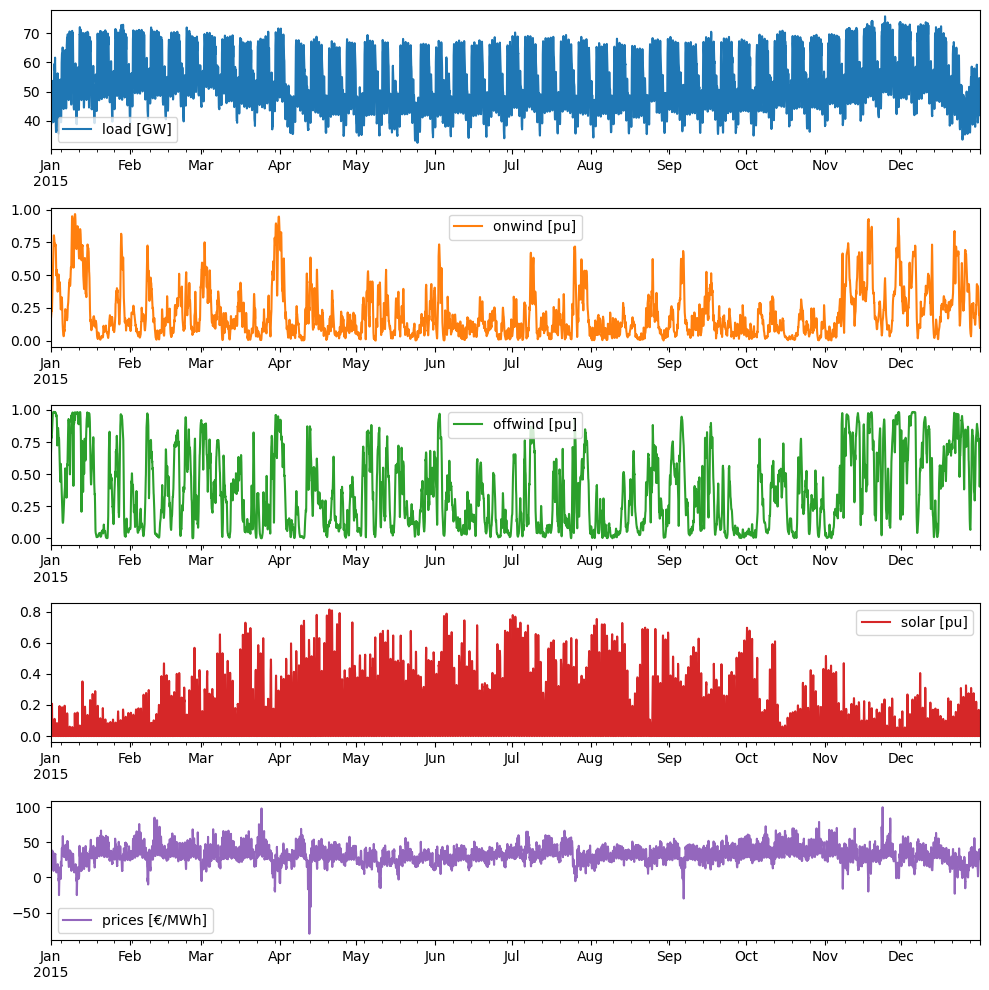

In [45]:
fig, a = plt.subplots(5,1,figsize=(10, 10), tight_layout=True)
df.plot(ax = a, subplots = True)

### Task e: Plot the time series for the month May

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

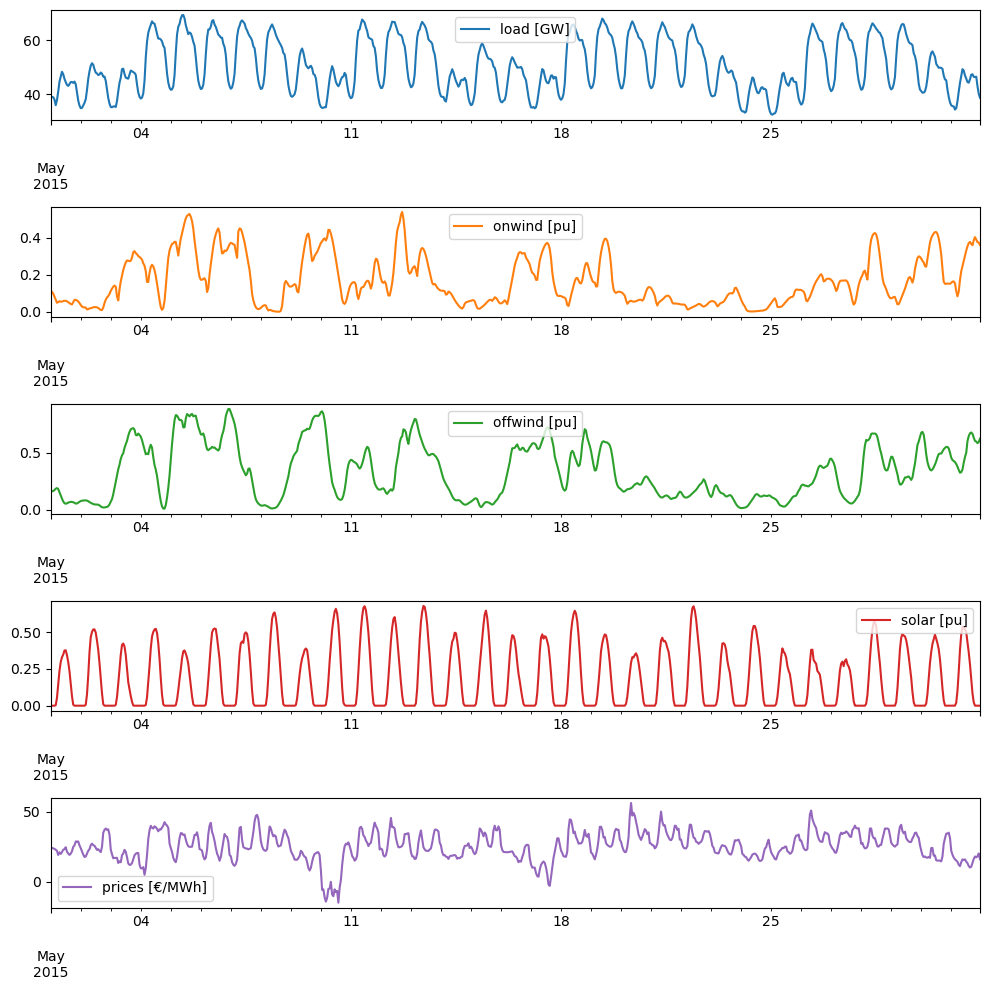

In [46]:
fig, a = plt.subplots(5,1 ,figsize=(10, 10), tight_layout=True)
df.loc["2015-05"].plot(ax = a, subplots = True)

### Task f: Resample the time series to daily, weeky, and monthly frequencies and create a plot that contains the variously resampled time series in one figure.

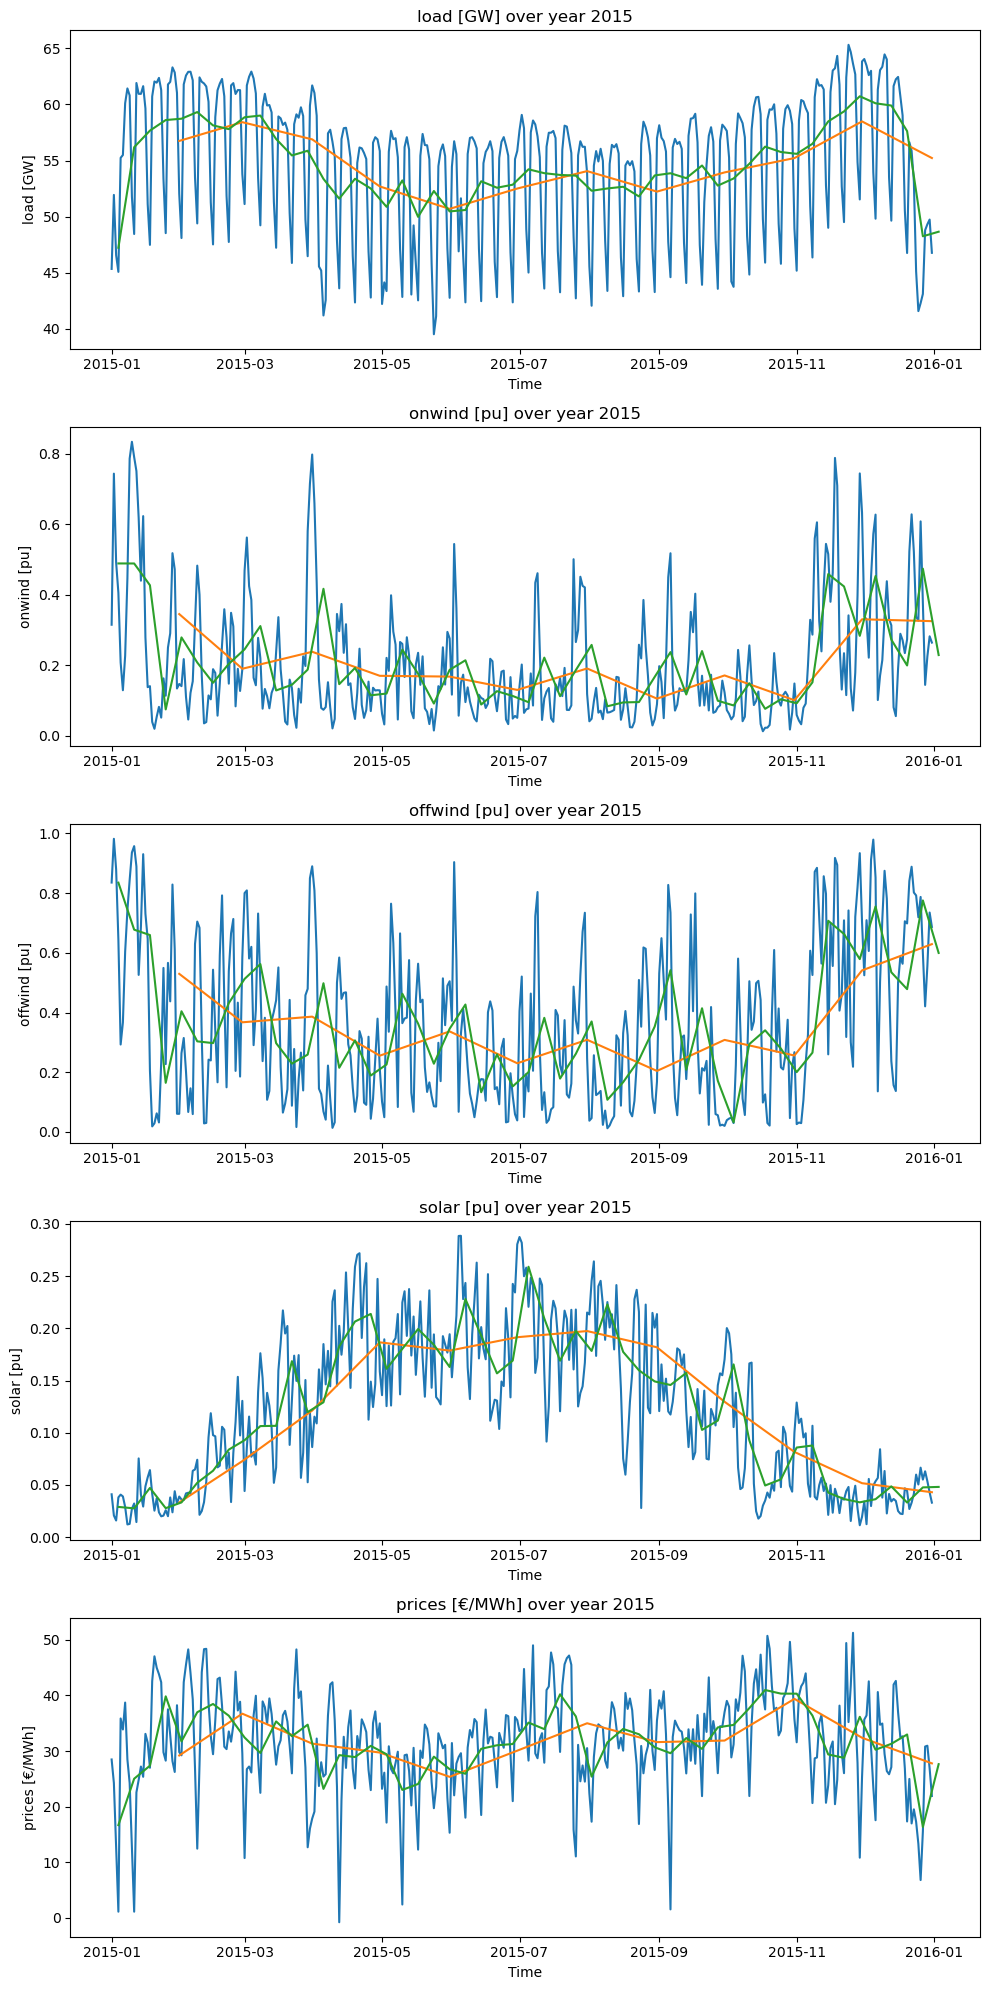

In [47]:
df_1D = df.resample("1D").mean()
df_1W = df.resample("1W").mean()
df_1M = df.resample("1M").mean()

resample_dfs = [df_1D, df_1M, df_1W]

# Creating plots for different resamples.
# Creating a seperate plot for each column. For more categories in one plot, the
# plot would not be any usefull and to stuffed.
figure, axis = plt.subplots(len(df.columns))
for col in enumerate(df.columns):
    for i  in resample_dfs:
        axis[col[0]].plot(i.loc[:, col[1]].dropna())
    axis[col[0]].set_ylabel(col[1])
    axis[col[0]].set_xlabel("Time")
    axis[col[0]].set_title(str(col[1] + " over year 2015"))

figure.set_figwidth(10)
figure.set_figheight(20)
figure.legend = True
figure.tight_layout()


plt.show()

# Resampled Plots foor each category
# Category Names, axes

### Task g: Ascending (Duration curves) for one year and each Category

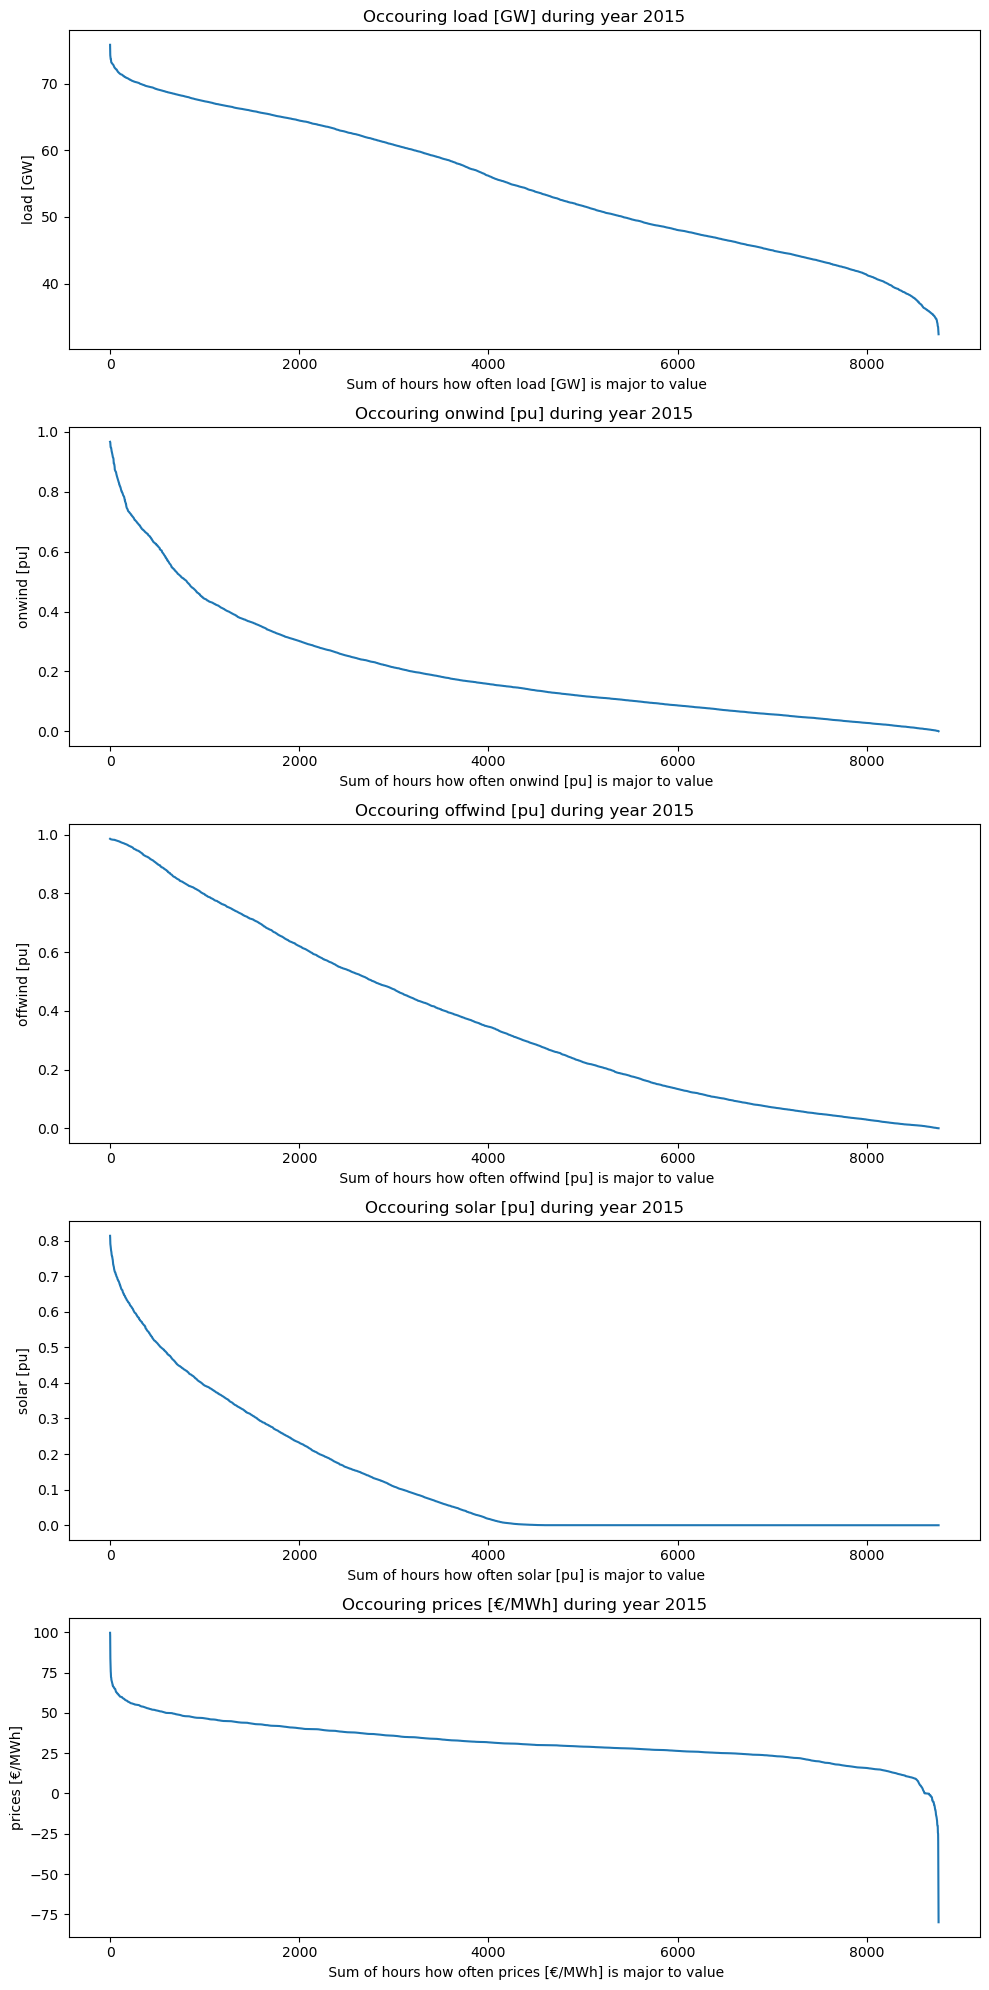

In [48]:
figure, axis = plt.subplots(len(df.columns))
for col in enumerate(df.columns):
    axis[col[0]].plot(df.loc[:, col[1]].sort_values(ascending=False).reset_index(drop=True).dropna())
    axis[col[0]].set_ylabel(col[1])
    axis[col[0]].set_xlabel(" Sum of hours how often "+ col[1]+ " is major to value")
    axis[col[0]].set_title(str("Occouring " +col[1] + " during year 2015"))
figure.set_figwidth(10)
figure.set_figheight(20)
figure.tight_layout()
plt.show()


### Task h: Histogram for Datasets (Daily data is used since the other Data resamples do not really make sense to plot)

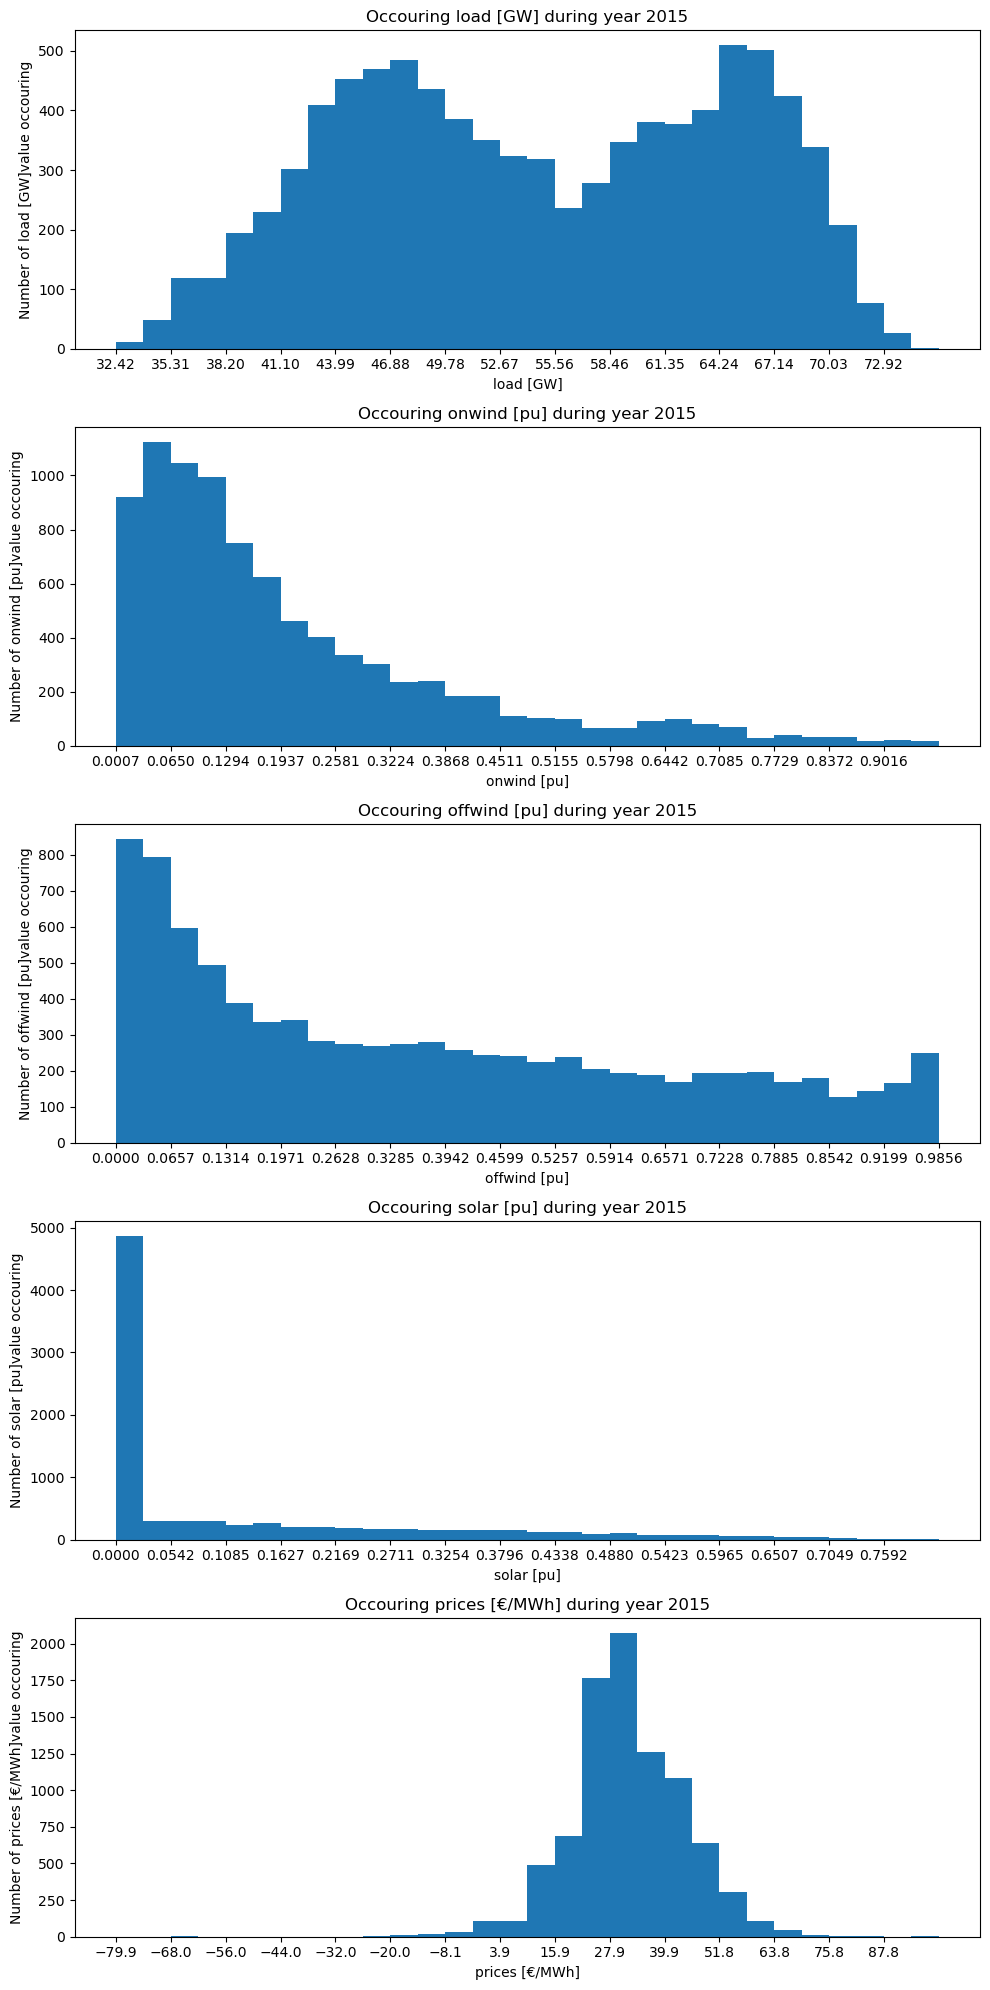

In [49]:
figure, ax = plt.subplots(len(df.columns))
for col in enumerate(df.columns):
    x = df.loc[:, col[1]].dropna()
    ax[col[0]].hist(x, bins=30)
    ax[col[0]].set_ylabel("Number of "+col[1]+"value occouring")
    ax[col[0]].set_xlabel(col[1])
    ax[col[0]].set_title(str("Occouring " +col[1] + " during year 2015"))
    ax[col[0]].set_xticks(np.arange(min(x), max(x), ((max(x)-min(x))/15)))
figure.set_figwidth(10)
figure.set_figheight(20)
figure.tight_layout()

plt.show()

### Perform a Fourier transformation of the time series. What are the dominant frequencies? How can they be explained?

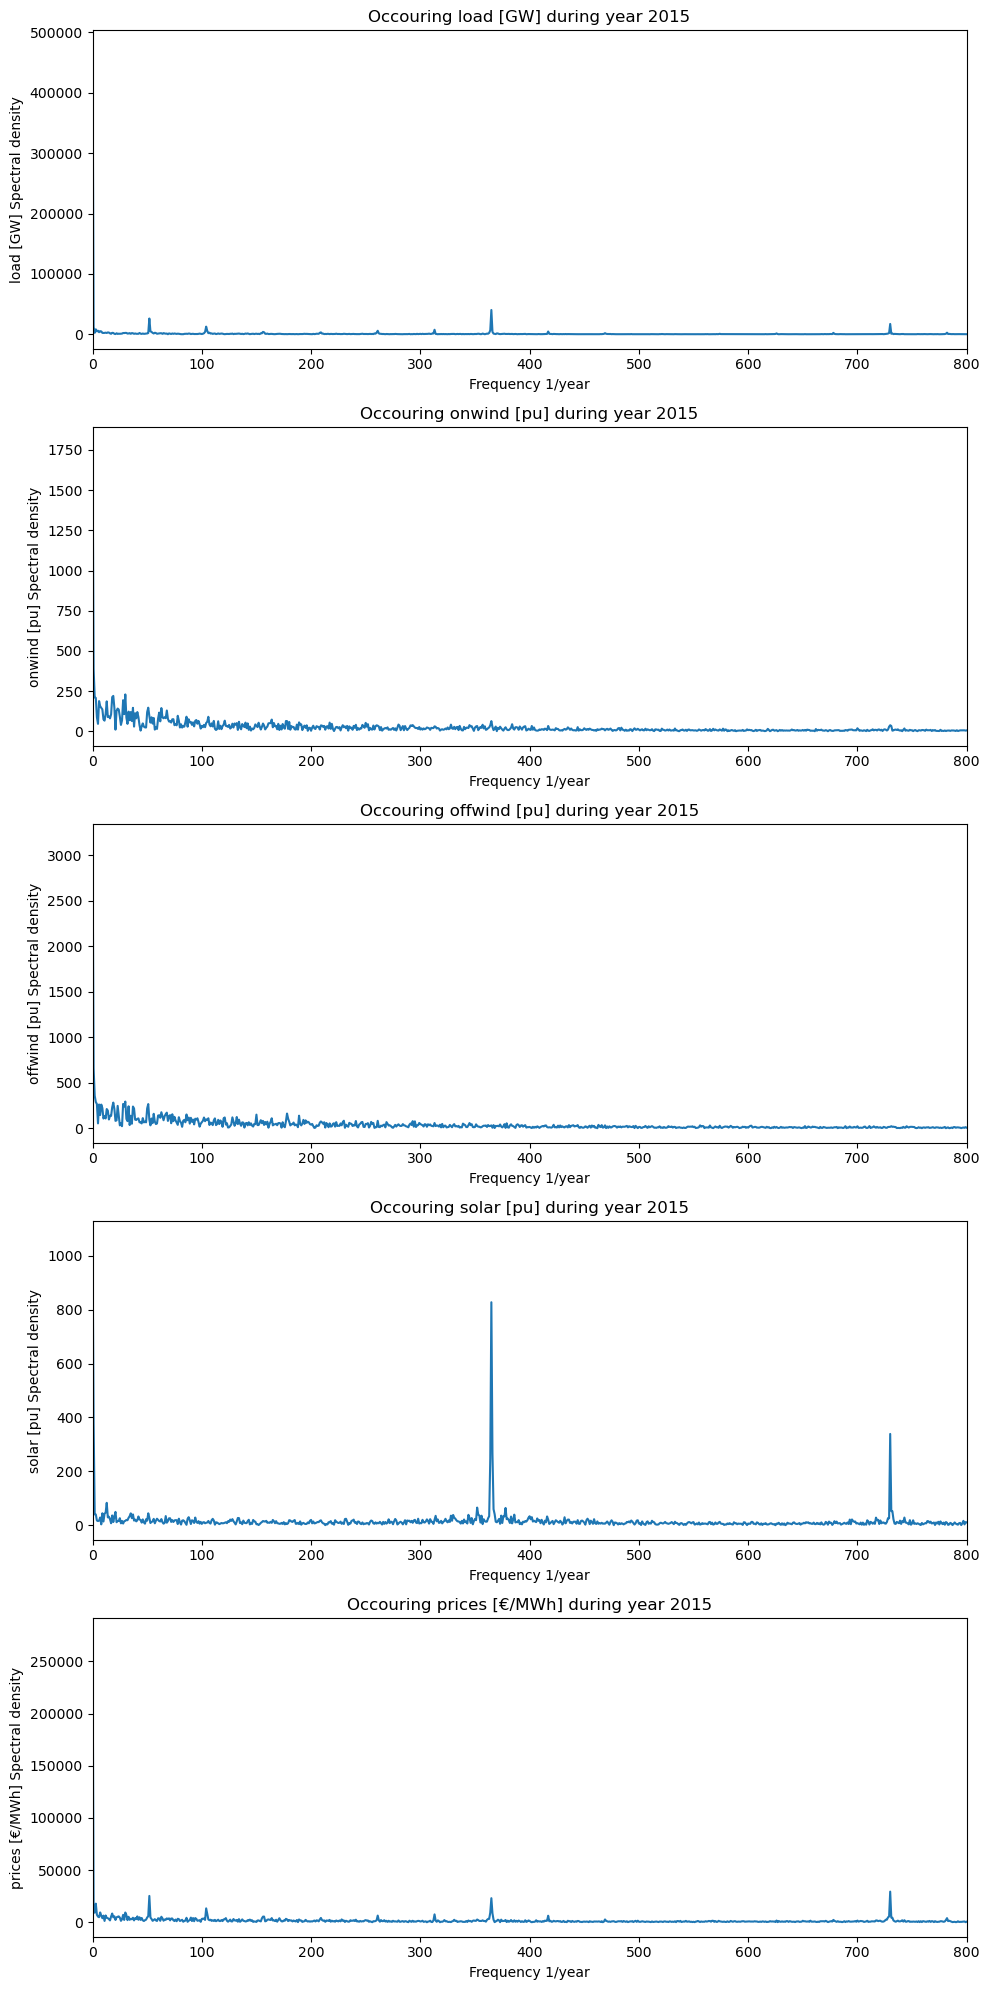

In [50]:
figure, ax = plt.subplots(len(df.columns))
for col in enumerate(df.columns):
    
    yf = fft(df.loc[:,col[1]])
    x = scipy.fftpack.fftfreq(yf.size ,1/yf.size)

    
    ax[col[0]].plot(x[:x.size//2], abs(yf)[:yf.size//2])
    ax[col[0]].set_ylabel(col[1]+" Spectral density")
    ax[col[0]].set_xlabel("Frequency 1/year")
    ax[col[0]].set_xlim([0,800])
    ax[col[0]].set_title(str("Occouring " +col[1] + " during year 2015"))
figure.set_figwidth(10)
figure.set_figheight(20)
figure.tight_layout()

plt.show()

# For all plots (for all columns) the most dominant frequency is the hourly frequenzy. This might be due to the very volatile
# and fast changing nature of the electricity market

# The Load as well as the prices have peaks every ~36 hours, they might correlate since prices and load 
# are closely interconnected.

# Wind Frequency analysis shows that its mixed and hard to make predictions on wind power

# Solar has a peak at ~8 hours which is interesting and I found that to be unexpected. Since daily changes are expected 
# to happen every 24 hours


### Calculate the Pearson correlation coefficients between all given time series and identify the time series with strongest (positive/negative) and weakest correlations. Briefly write down your thoughts about what may be the reason for these correlations.

In [51]:
df.corr(method="pearson")

# The highest correlation can be found between offshore and onshore wind. 

# The second highest correlation can be found between prices and loads. If loads are increasing the price is ramping up as well
# as our market principles dictate

# Another strong (negative)correlation can be found between solar and wind(onshore) which means
# solar power is likely increasing when windspeeds are lowering

# Solar power has a correlation to loads as well. 

# The weakest correlation can be found between solar power and prces as well as between wind energy and loads

load [GW]  onwind [pu]  offwind [pu]  solar [pu]  \
load [GW]        1.000000     0.096055      0.086377    0.353600   
onwind [pu]      0.096055     1.000000      0.796389   -0.141847   
offwind [pu]     0.086377     0.796389      1.000000   -0.165698   
solar [pu]       0.353600    -0.141847     -0.165698    1.000000   
prices [€/MWh]   0.558277    -0.428380     -0.364651    0.017865   

                prices [€/MWh]  
load [GW]             0.558277  
onwind [pu]          -0.428380  
offwind [pu]         -0.364651  
solar [pu]            0.017865  
prices [€/MWh]        1.000000

## Task 3

In [52]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

# Additionally importing packages
import numpy as np
from collections import OrderedDict
from sklearn.linear_model import LinearRegression
from numpy.fft import fft
import scipy

# Surpressing warnings
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

### Task (a) Read the CSV file as DataFrame. The separator in this dataset is a semicolon (“;”). Use the first column as the index column.

In [53]:

df = pd.read_csv("https://tubcloud.tu-berlin.de/s/JamLFf2Pjc6KHfp/download/Industrial_Database.csv", delimiter = ";",  index_col = "Unnamed: 0")
df.head(3)

SiteID              CompanyName                           SiteName  \
0       1           voestalpine AG  voestalpine Stahl Donawitz GesmbH   
1       2           voestalpine AG             voestalpine Stahl GmbH   
2       3  Schmid Industrieholding        Wopfinger Baustoffindustrie   

                 Address CityCode     City  Country  \
0     Kerpelystrasse 199     8700   Leoben  Austria   
1  voestalpine-Strasse 3     4020     Linz  Austria   
2            Wopfing 156     2754  Waldegg  Austria   

                         geom       Subsector DataSource  Emissions_ETS_2014  \
0   POINT(15.067806 47.03378)  Iron and steel  ETS/EPRTR           2808536.0   
1  POINT(14.343056 48.281944)  Iron and steel  ETS/EPRTR           8698426.0   
2   POINT(16.085917 47.87225)          Cement  ETS/EPRTR            364798.0   

   Emissions_EPRTR_2014  Production  Fuel_Demand  Excess_Heat_100-200C  \
0             2810000.0  2726675.56      6346.15                192.34   
1             8660000.0  8444892.86     19732.48                595.71   
2              408000.0   477398.78       464.13                  0.00   

   Excess_Heat_200-500C  Excess_Heat_500C  Excess_Heat_Total  
0                173.66              0.00             366.01  
1                330.48             40.16             966.36  
2                 69.62              0.00              69.62

In [54]:
# Task b When you expect the dataset, you will find that the geographic information is given in the “geom”
# column in a format similar to “POINT(x, y)”. This format is called the Well-known text repre-
# sentation of geometry (or short: WKT). Such WKT strings can be used to convert the ordinary
# DataFrame into a GeoDataFrame using the function gpd.GeoSeries.from_wkt(). The points
# are given in the coordinate reference system EPSG:4326, which you should also specify when
# constructing the GeoDataFrame. After building the GeoDataFrame, set the column “SiteID” as
# its index

gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry = gpd.GeoSeries.from_wkt(df.geom))

# Removing excess/duplicate column
gdf.pop("geom")

# Setting new Index
gdf = gdf.set_index("SiteID")

# Results:
gdf.head(3)

CompanyName                           SiteName  \
SiteID                                                               
1                voestalpine AG  voestalpine Stahl Donawitz GesmbH   
2                voestalpine AG             voestalpine Stahl GmbH   
3       Schmid Industrieholding        Wopfinger Baustoffindustrie   

                      Address CityCode     City  Country       Subsector  \
SiteID                                                                     
1          Kerpelystrasse 199     8700   Leoben  Austria  Iron and steel   
2       voestalpine-Strasse 3     4020     Linz  Austria  Iron and steel   
3                 Wopfing 156     2754  Waldegg  Austria          Cement   

       DataSource  Emissions_ETS_2014  Emissions_EPRTR_2014  Production  \
SiteID                                                                    
1       ETS/EPRTR           2808536.0             2810000.0  2726675.56   
2       ETS/EPRTR           8698426.0             8660000.0  8444892.86   
3       ETS/EPRTR            364798.0              408000.0   477398.78   

        Fuel_Demand  Excess_Heat_100-200C  Excess_Heat_200-500C  \
SiteID                                                            
1           6346.15                192.34                173.66   
2          19732.48                595.71                330.48   
3            464.13                  0.00                 69.62   

        Excess_Heat_500C  Excess_Heat_Total                   geometry  
SiteID                                                                  
1                   0.00             366.01  POINT (15.06781 47.03378)  
2                  40.16             966.36  POINT (14.34306 48.28194)  
3                   0.00              69.62  POINT (16.08592 47.87225)

### Task (c) For how many industrial sites is the data on its location missing Location information is stored in geometry column

In [55]:
print("There are", len(gdf.index)-gdf.count().geometry,"missing site locations assuming every SiteID represents a individual \
industrial Site and geometry Information equals to location Data")


There are 515 missing site locations assuming every SiteID represents a individual industrial Site and geometry Information equals to location Data


### Task d: Visualise the data contained in the GeoDataFrame in a matplotlib plot such that the following criteria are fulfilled: 
### • figure size 10 by 10 inches
### • axis projection is Plate Carree projection
### • circles are coloured by the industry sector
### • a legend indicates which colour corresponds to which industry sector
### • circle size is proportional to ETS emissions and appropriately sized (a legend is not necessary)
### • coastlines are shown in black and country borders in grey


<GeoAxesSubplot: >

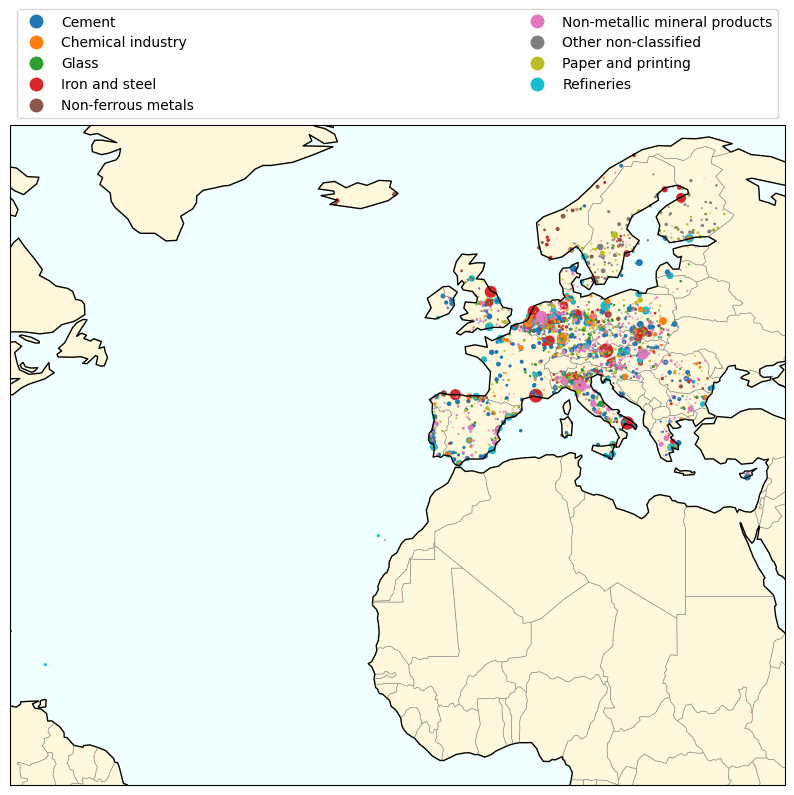

In [56]:
fig = plt.figure(figsize=(10,10))

crs = ccrs.PlateCarree()

ax = plt.axes(projection = crs)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color='grey', linewidth=0.5)
ax.add_feature(cartopy.feature.OCEAN, color='azure')
ax.add_feature(cartopy.feature.LAND, color='cornsilk')
gdf.plot(
    ax=ax,
    column='Subsector',
    markersize=gdf.Emissions_ETS_2014/1e5,
    legend=True,
    legend_kwds={
        "bbox_to_anchor":(0, 1, 1, 0), "loc":"lower left", "mode":"expand", "ncol":2
    },
    facecolors="None"
)

# Plot is created as follows:


### Task e Create a matplotlib bar chart outlining the ETS emissions per industry sector in units of MtCO2/year. Make sure to label the axes appropriately


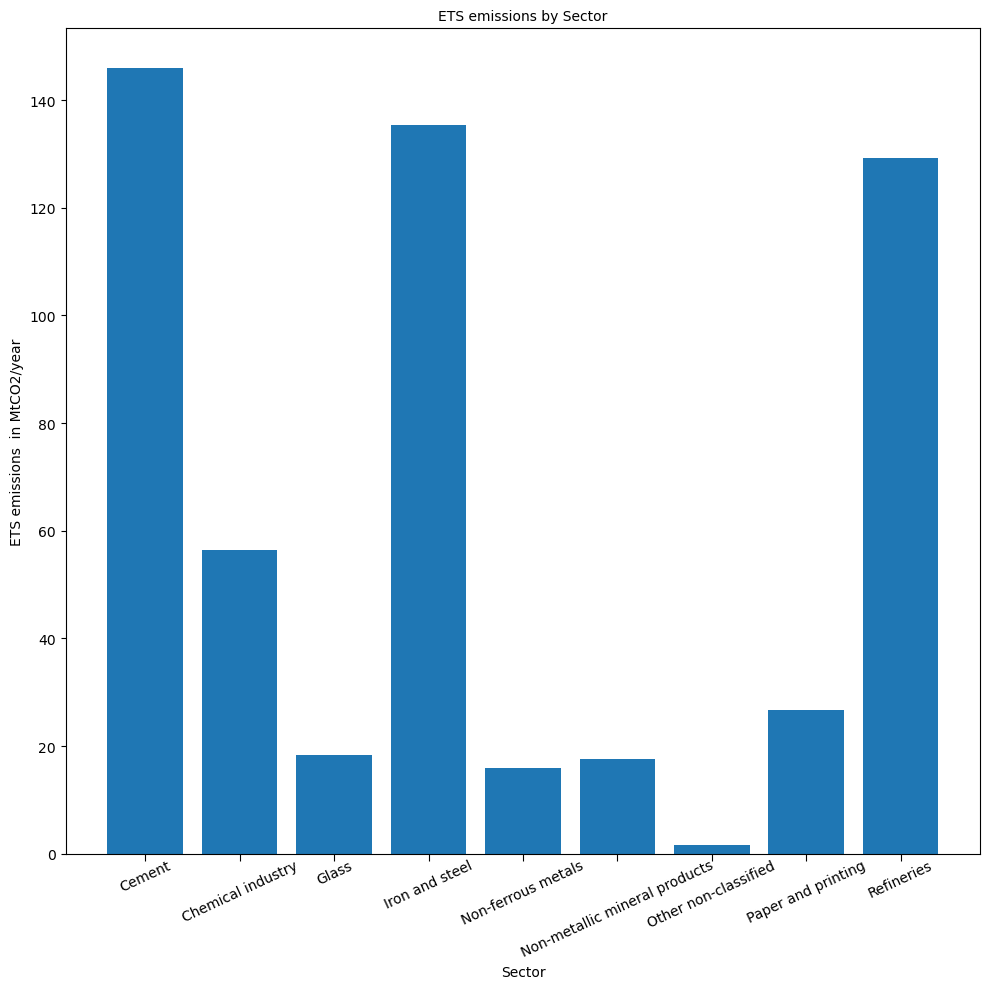

In [57]:
fig, ax = plt.subplots(1,1, figsize=(10,10), label=True, layout="tight")
ax.tick_params(axis = "x", labelrotation=25, length = 5, pad = -2)
sector_groups = gdf.groupby("Subsector")
# Calculate emissions and conver to MtCO2/year
dta = sector_groups.Emissions_ETS_2014.sum()/1e6

# Setting up Plot and Font sizes:
plt.rc('font', size=10)
plt.rc('axes', titlesize=10)
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)

plt.xticks(range(len(dta)), dta.keys())
plt.xlabel('Sector')
plt.ylabel('ETS emissions  in MtCO2/year')
plt.title('ETS emissions by Sector')
plt.bar(range(len(dta)), dta, figure=fig) 
plt.show()
# Some categories do have very large names, therefore the Names are rotated

### Task f: Identify the industry sector with the highest ETS emissions. What’s the share in percent of this sector relative to the total emissions accounted for?

In [58]:
dta = sector_groups.Emissions_ETS_2014.sum()/1e6

print("The highest ETS Emissions are produced in the" ,dta.sort_values().keys()[-1], "Industry sector.")
print("The ",dta.sort_values().keys()[-1]," Industry Sector is responsible for", round(dta.sort_values()[-1]/dta.sum()*100,2),"% of the Emissions of this Dataset")

The highest ETS Emissions are produced in the Cement Industry sector.
The  Cement  Industry Sector is responsible for 26.69 % of the Emissions of this Dataset


### Task g: Identify the three countries with the highest ETS emissions in the chemical industry sector

In [59]:
country_chemical = sector_groups.get_group("Chemical industry").groupby("Country")
dta = (country_chemical.Emissions_ETS_2014.sum()/1e6).sort_values(ascending=False)[0:3]
print("The three countries with the highest emissions in the Chemical Industry are:")
dta



The three countries with the highest emissions in the Chemical Industry are:


Country
Germany        18.070142
Netherlands     9.311542
Poland          6.839464
Name: Emissions_ETS_2014, dtype: float64

### Task h: For each sector, identify the country with the highest level of ETS emissions.


In [60]:
def find_highest_in_group_of_group(group, group_of_group, highest, gdf)->None:
    """
    Takes a Grouping condition and searches for the highest value inside of the second grouping condition
    """

    country_group = gdf.groupby(group)
    country_keys = country_group.groups.keys()
    for country_key in country_keys:
        cgr = country_group.get_group(country_key)
        subsec = cgr.groupby(group_of_group)[highest].sum().sort_values(ascending=False).index[0]

        print(country_key,"has its highest",highest,"in",group_of_group,"of", subsec)
    
find_highest_in_group_of_group(group = "Subsector",
                              group_of_group="Country",
                              highest = "Emissions_ETS_2014",
                              gdf = gdf)

Cement has its highest Emissions_ETS_2014 in Country of Germany
Chemical industry has its highest Emissions_ETS_2014 in Country of Germany
Glass has its highest Emissions_ETS_2014 in Country of Germany
Iron and steel has its highest Emissions_ETS_2014 in Country of Germany
Non-ferrous metals has its highest Emissions_ETS_2014 in Country of Germany
Non-metallic mineral products has its highest Emissions_ETS_2014 in Country of Poland
Other non-classified has its highest Emissions_ETS_2014 in Country of Bulgaria
Paper and printing has its highest Emissions_ETS_2014 in Country of Germany
Refineries has its highest Emissions_ETS_2014 in Country of Germany


### Task i: For each country, identify the sector with the highest level of ETS emissions.


In [61]:
find_highest_in_group_of_group(gdf = gdf,
                               group="Country",
                               group_of_group="Subsector",
                               highest="Emissions_ETS_2014")

Austria has its highest Emissions_ETS_2014 in Subsector of Iron and steel
Belgium has its highest Emissions_ETS_2014 in Subsector of Cement
Bulgaria has its highest Emissions_ETS_2014 in Subsector of Cement
Croatia has its highest Emissions_ETS_2014 in Subsector of Other non-classified
Cyprus has its highest Emissions_ETS_2014 in Subsector of Cement
Czech Republic has its highest Emissions_ETS_2014 in Subsector of Cement
Denmark has its highest Emissions_ETS_2014 in Subsector of Cement
Estonia has its highest Emissions_ETS_2014 in Subsector of Paper and printing
Finland has its highest Emissions_ETS_2014 in Subsector of Iron and steel
France has its highest Emissions_ETS_2014 in Subsector of Cement
Germany has its highest Emissions_ETS_2014 in Subsector of Iron and steel
Greece has its highest Emissions_ETS_2014 in Subsector of Cement
Hungary has its highest Emissions_ETS_2014 in Subsector of Refineries
Iceland has its highest Emissions_ETS_2014 in Subsector of Non-ferrous metals
Irela

### Task j: List the 20 German companies responsible for the most ETS emissions and their respective emissions in MtCO2/year in descending order

In [62]:
dta = (gdf.groupby("Country").get_group("Germany").groupby("CompanyName").Emissions_ETS_2014.sum()/1e6).sort_values(ascending=False)
print("The 20 German companies responsible for the most ETS emissions and their respective emissions in MtCO2/year are:")
# First 20 entries:
dta[0:19]

The 20 German companies responsible for the most ETS emissions and their respective emissions in MtCO2/year are:


CompanyName
ThyssenKrupp Steel Europe AG                                 8.418938
Hüttenwerke Krupp Mannesmann GmbH                            4.666233
RUHR OEL GmbH                                                4.568524
Salzgitter Flachstahl GmbH Abt. Umweltschutz / 08 TUI        4.465254
ROGESA Roheisengesellschaft Saar mbH                         4.223992
BASF                                                         3.974214
HeidelbergCement AG                                          3.799311
PCK Raffinerie GmbH Schwedt                                  3.714705
Rheinkalk GmbH                                               2.945368
Werk 1 MIRO-Mineralölraffinerie Oberrhein GmbH & Co.KG       2.782816
ArcelorMittal Bremen GmbH                                    2.757458
SKW Stickstoffwerke Piesteritz GmbH                          2.394804
Schwenk Zement KG                                            2.295420
INEOS Manufacturing Deutschland GmbH                         2.202742
Pruna Be

In [63]:
# Get File and set Index
nuts = gpd.read_file("https://tubcloud.tu-berlin.de/s/5WJ6pGsBKR7a3sp/download/NUTS_RG_10M_2021_4326.geojson", index="NUTS_ID")
nuts = nuts.set_index("id")
# Looking at the Data first
nuts.head(3)

NUTS_ID  LEVL_CODE CNTR_CODE   NAME_LATN  NUTS_NAME  MOUNT_TYPE  \
id                                                                      
BG423   BG423          3        BG  Pazardzhik  Пазарджик         3.0   
BG424   BG424          3        BG     Smolyan     Смолян         3.0   
BG425   BG425          3        BG   Kardzhali   Кърджали         3.0   

       URBN_TYPE  COAST_TYPE    FID  \
id                                    
BG423          2           3  BG423   
BG424          3           3  BG424   
BG425          3           3  BG425   

                                                geometry  
id                                                        
BG423  POLYGON ((24.42101 42.55306, 24.41032 42.46950...  
BG424  POLYGON ((25.07422 41.79348, 25.05851 41.75177...  
BG425  POLYGON ((25.94863 41.32034, 25.90644 41.30757...

In [64]:
# Grouping to Level codes since tasks are based on Nuts levels
nuts_levels_groups = nuts.groupby("LEVL_CODE")
nuts_levels_groups.groups.keys()
# Setting crs
gdf = gdf.to_crs(3035)

# Nuts level 2 and 3 are relevant, for easier access they are predefined here
nuts2 = nuts_levels_groups.get_group(2).to_crs(3035)

nuts3 = nuts_levels_groups.get_group(3).to_crs(3035)

### Task k: Plot a choropleth map of NUTS-2 regions with matplotlib which shows each region’s industry ETS emissions per area (in tCO2/year/km2). Limit the colorbar to 1 kt/year/km2 by passing the keyword argument vmax=1000 to the geopandas plotting function. Focus the viewon continental Europe by setting the appropriate bounds of the figure. Add a colorbar to the right-hand side of the plot.

<GeoAxesSubplot: >

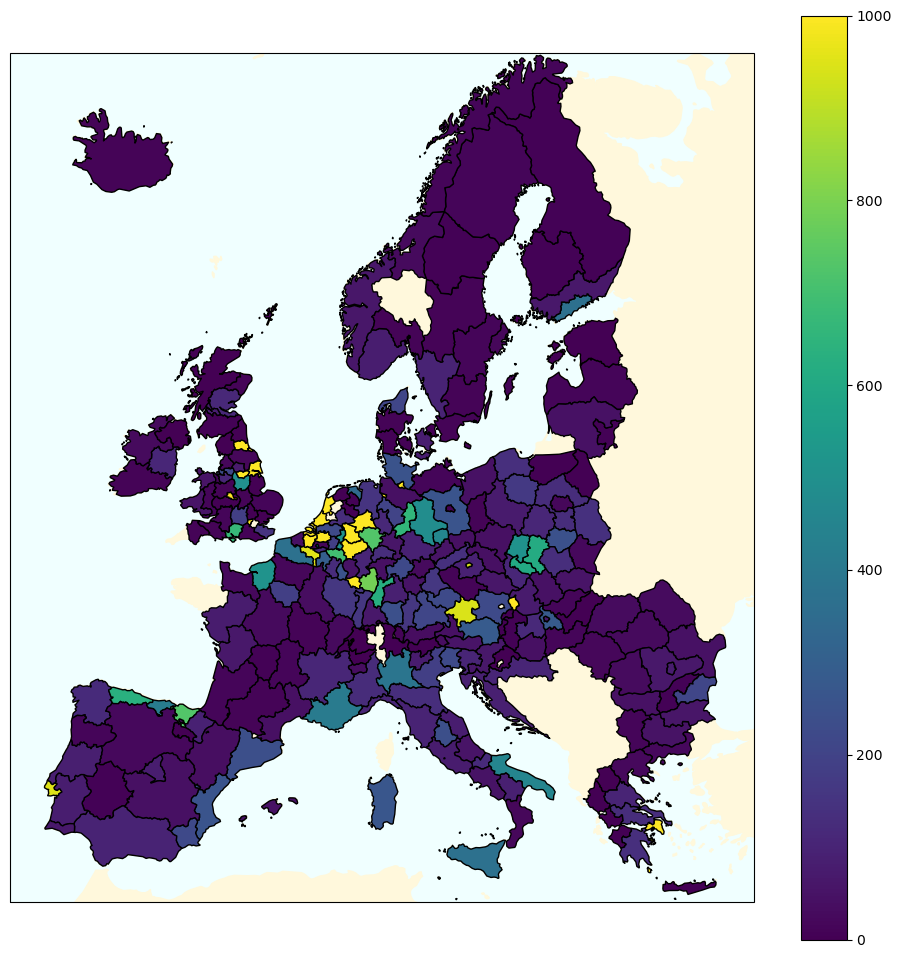

In [65]:
# New column in the Nuts DataFrame contains areal information
nuts2["area"] = nuts2.area/1e6
nuts3["area"] = nuts2.area/1e6

# Joining nuts regions and Industrial Data to allocate each Industrial spatial data to the Nuts area
joined = gdf.sjoin(nuts2)
emissions = ((joined.groupby("NUTS_ID").Emissions_ETS_2014.sum())/nuts2["area"])
nuts2["area_emissions"]=emissions

# Plotting
fig = plt.figure(figsize=(12,12))

ax = plt.axes(projection=ccrs.epsg(3035))

# Zooming in to ~Continental Europe:
ax.set_extent([-10, 28, 34, 71])

# Adding colors to make it look more like a Map:
ax.add_feature(cartopy.feature.OCEAN, color='azure')
ax.add_feature(cartopy.feature.LAND, color='cornsilk')


# Plotting with options:
nuts2.plot(
    ax=ax,
    edgecolor='black',
    facecolor='lightgrey',
    column="area_emissions",
    legend=True,
    vmax=1000
)

# Some regions have outstanding emission levels (even though Emissionlevels are topped at 1000 tCO2/year/km²)


### Task l: Which NUTS-3 region has the highest level of industry ETS emissions? In addition to the “NUTS_ID”, also provide the common name of the region. Which companies are settled there and which sectors do they belong to?

In [66]:
# New joined GeoDataFrame:
joined = gdf.sjoin(nuts3)

# Adding emissions to nuts3 region helps to allocate emissions to Nuts region
emissions = (joined.groupby("NUTS_ID").Emissions_ETS_2014.sum())
nuts3["emissions"]=emissions

# Find area with the highest emissions:
highest_emissione_area= nuts3.sort_values("emissions", ascending=False)
highest_emissione_area = highest_emissione_area.loc[highest_emissione_area.index[0], :]
print("The NUTS3 area with the highest emissions is", highest_emissione_area["NUTS_ID"], "with common Name", highest_emissione_area["NAME_LATN"])
print("The companies settled in this Region and their Sectors are:")
joined.groupby("NUTS_ID").get_group("DEA12").loc[:,["CompanyName","Subsector"]]
# It seems the high emissions are caused by Iron and steel sector

The NUTS3 area with the highest emissions is DEA12 with common Name Duisburg, Kreisfreie Stadt
The companies settled in this Region and their Sectors are:


CompanyName           Subsector
SiteID                                                                       
143                     Hüttenwerke Krupp Mannesmann GmbH      Iron and steel
147                                 ThyssenKrupp Steel AG      Iron and steel
148                          ThyssenKrupp Steel Europe AG      Iron and steel
153                        DK Recycling und Roheisen GmbH      Iron and steel
158                          voestalpine Bahnsysteme GmbH      Iron and steel
159                            ArcelorMittal Ruhrort GmbH      Iron and steel
160     Pruna Betreiber GmbH vertreten durch die KBS GmbH      Iron and steel
1391                         ThyssenKrupp Steel Europe AG      Iron and steel
1392                         ThyssenKrupp Steel Europe AG      Iron and steel
1393                         ThyssenKrupp Steel Europe AG      Iron and steel
1394                         ThyssenKrupp Steel Europe AG      Iron and steel
1396                                 Huntsman Corporation   Chemical industry
1901                            Emscher Aufbereitung GmbH      Iron and steel
2172                                   Outokumpu VDM GmbH  Non-ferrous metals
2296                            Befesa Zinc Duisburg GmbH  Non-ferrous metals
2363                              Norske Skog Walsum GmbH  Paper and printing
2379                   Momentive Specialty Chemicals GmbH   Chemical industry
2383                          ArcelorMittal Hochfeld GmbH      Iron and steel

## Task 4

### Task a: Importing packages

In [67]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import atlite
import rasterio
import json

# Importing functions to acess faster
from rasterio.plot import show
from atlite.gis import ExclusionContainer
from atlite.gis import shape_availability

# Additionally importing packages
import numpy as np
from collections import OrderedDict
from sklearn.linear_model import LinearRegression
from numpy.fft import fft
import scipy

# Surpressing warning for excluder
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning)


In [68]:
# Setting up Data urls for easy access

# Constraints:
natura2000="https://tubcloud.tu-berlin.de/s/zPMqJFPD8tKq2Ss/download/Natura2000_end2021-LU.gpkg"
cdda = "https://tubcloud.tu-berlin.de/s/fZfFMim8MYNTsgA/download/CDDA_2022_v01_public-LU.gpkg"
NaturalEarth5km = "https://tubcloud.tu-berlin.de/s/TbEJ9Lsy9EpTcQS/download/ne_10m_airports.gpkg"
NaturalEarth300m = "https://tubcloud.tu-berlin.de/s/zcKQ95TgpyMJb8E/download/ne_10m_roads.gpkg"
corine = "https://tubcloud.tu-berlin.de/s/z7aY8HNCdETQMT7/download/U2018_CLC2018_V2020_20u1-LU.tif"
constraints = [natura2000,
               cdda,
               NaturalEarth5km,
               NaturalEarth300m,
               corine,
              corine]

# Countries:
countries = "https://tubcloud.tu-berlin.de/s/7bpHrAkjMT3ADSr/download/country_shapes.geojson"

corine_sentinel = "https://collections.sentinel-hub.com/corine-land-cover/readme.html"


### Task b Translate the CORINE land classes listed above to code values as stored in the dataset using the table above. Also state the descriptive names of the classes. Distinguish between (a) classes to which a distance should be kept and (b) classes deemed eligible for wind development.

In [69]:
# Writing a DataFrane from csv File (Containing information on Corine land classes) to translate Land classes
corine_classes = pd.read_csv("Mappe1.csv", delimiter = ";", index_col = "Value")
for i in corine_classes.iterrows():
    corine_classes.loc[i[0], "Threedigit_code"] = i[1].Label[0:3]
    corine_classes.loc[i[0], "Descriptive"] = i[1].Label[5:]
corine_classes.pop("Label")

# Loading raster data
clc = rasterio.open(constraints[4])
band = clc.read(1)
new_band = np.ndarray(shape=(814, 562), dtype = int)
# Iterating over every element in the 2D array (for sure there is a more elegant and faster way, but this works fine):
for d, i in enumerate(band):
    for dd, k in enumerate(i):
        # Unfortunately the Dataset seems to be incomplete. -128 Code is missing
        if k != -128:
            # Changeing value:
            new_band[d, dd] = int(corine_classes.loc[k, "Threedigit_code"])
            
        else:
            new_band[d, dd] = int(-128)

# Writing another variable with better name:
corine_band = new_band     
print("New Values are:", np.unique(corine_band))
print("Class values are:")
corine_classes

New Values are: [-128  111  112  121  122  123  124  131  132  133  141  142  211  221
  222  231  242  243  311  312  313  324  411  511  512]
Class values are:


Threedigit_code                                        Descriptive
Value                                                                   
1                 111                            Continuous urban fabric
2                 112                         Discontinuous urban fabric
3                 121                     Industrial or commercial units
4                 122         Road and rail networks and associated land
5                 123                                         Port areas
6                 124                                           Airports
7                 131                           Mineral extraction sites
8                 132                                         Dump sites
9                 133                                 Construction sites
10                141                                  Green urban areas
11                142                       Sport and leisure facilities
12                211                          Non-irrigated arable land
13                212                         Permanently irrigated land
14                213                                        Rice fields
15                221                                          Vineyards
16                222                  Fruit trees and berry plantations
17                223                                       Olive groves
18                231                                           Pastures
19                241       Annual crops associated with permanent crops
20                242                       Complex cultivation patterns
21                243   Land principally occupied by agriculture with...
22                244                                Agro-forestry areas
23                311                                Broad-leaved forest
24                312                                  Coniferous forest
25                313                                       Mixed forest
26                321                                 Natural grasslands
27                322                                Moors and heathland
28                323                          Sclerophyllous vegetation
29                324                        Transitional woodland-shrub
30                331                            Beaches - dunes - sands
31                332                                         Bare rocks
32                333                           Sparsely vegetated areas
33                334                                        Burnt areas
34                335                        Glaciers and perpetual snow
35                411                                     Inland marshes
36                412                                          Peat bogs
37                421                                       Salt marshes
38                422                                            Salines
39                423                                   Intertidal flats
40                511                                      Water courses
41                512                                       Water bodies
42                521                                    Coastal lagoons
43                522                                          Estuaries
44                523                                      Sea and ocean
48                999                                             NODATA

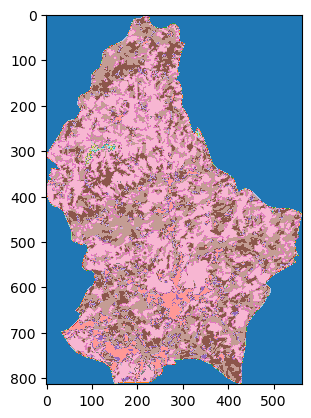

In [70]:
plt.imshow(corine_band, cmap='tab20')

### Task c: Load the country shapes as GeoDataFrame, reduce it to a single entry for Luxembourg, and reproject it to EPSG:3035.

<AxesSubplot: >

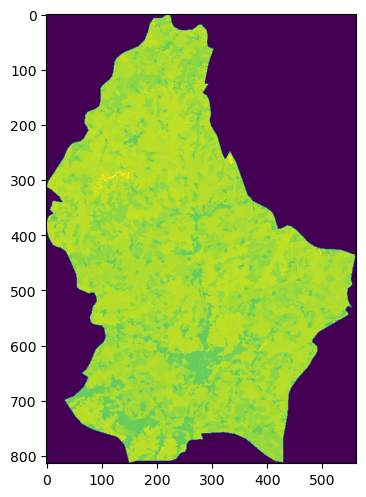

In [71]:
# Reading File:
countries = gpd.read_file(countries).set_index("name")
countries = countries.to_crs(3035)
# Reducing to Luxemburg:
LU = countries.loc["LU"]

# Plotting:
fig, ax = plt.subplots(figsize=(4,8))
countries.loc[["LU"]].plot(ax=ax, color='none', legend=True)
show(band, ax=ax)

### Task d: Plot and calculate (in %) the area excluded by each of the exclusion constraints (1.-6.) individually using the atlite.gis.ExclusionContainer and atlite.gis.shape_availability. Refer to the atlite tutorial for information on how to plot the output of the latter function with rasterio and matplotlib.

Eligible area is: 1977550000.0 m² which is about 75.813 % of Luxemburg
Therefore excluded area is: 630918800.0113049 m² which is about 24.187 % of Luxemburg
Eligible area is: 1260330000.0 m² which is about 48.317 % of Luxemburg
Therefore excluded area is: 1348138800.0113049 m² which is about 51.683 % of Luxemburg
Eligible area is: 2529970000.0 m² which is about 96.991 % of Luxemburg
Therefore excluded area is: 78498800.01130486 m² which is about 3.009 % of Luxemburg
Eligible area is: 2468100000.0 m² which is about 94.619 % of Luxemburg
Therefore excluded area is: 140368800.01130486 m² which is about 5.380999999999999 % of Luxemburg
Eligible area is: 832010000.0 m² which is about 31.896 % of Luxemburg
Therefore excluded area is: 1776458800.0113049 m² which is about 68.104 % of Luxemburg
Eligible area is: 1379740000.0 m² which is about 52.895 % of Luxemburg
Therefore excluded area is: 1228728800.0113049 m² which is about 47.105000000000004 % of Luxemburg


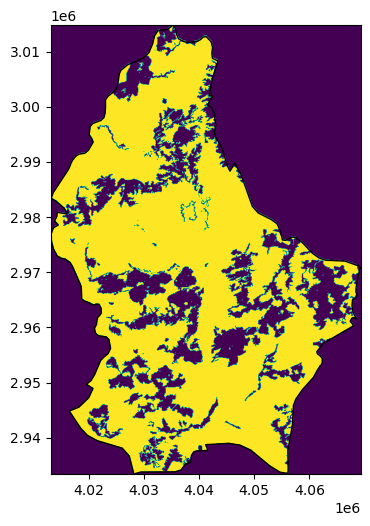

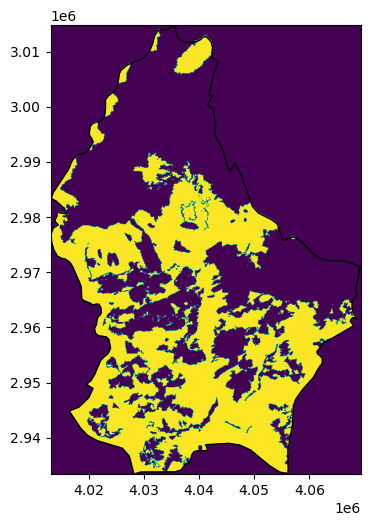

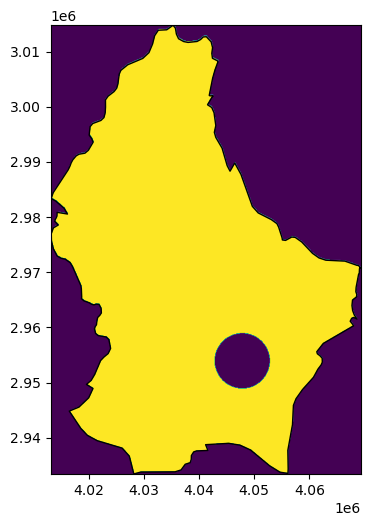

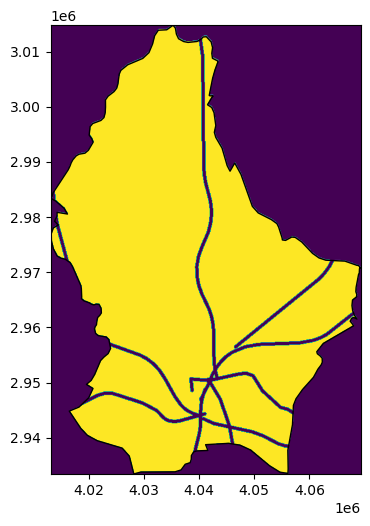

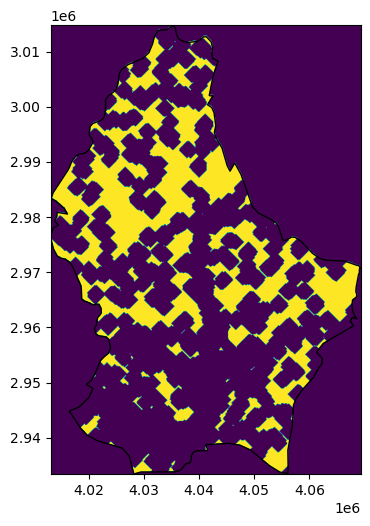

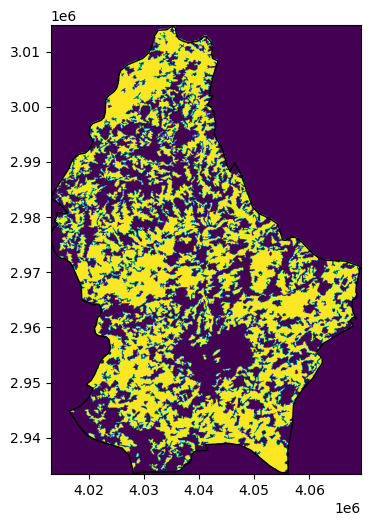

In [89]:
# Translate codes for raster (by hand, sometimes its faster!)
codes1 = [1,2,3,4,5,6] # from [111, 112, 121,122, 123, 124] 
codes2 = [12,13,14,18,19,20,21,26,28,29,32] # from [211, 212, 213, 231, 241, 242, 243, 321, 323, 324, 333]

# Country area calculating:
shape = countries.to_crs(3035).loc[["LU"]].geometry
lu_area = shape.area

# Now calculate the eligible area in a loop for all the constraints
for constraint_nr, constraint in enumerate(constraints):
    excluder = ExclusionContainer(crs=3035)
    # Gpkg ExclusionContainer.add_geometry can be used for gpkg files
    if constraint_nr <2:
        gdf = gpd.read_file(constraint)
        excluder.add_geometry(gdf)
    elif constraint_nr ==2:
        gdf = gpd.read_file(constraint)
        excluder.add_geometry(gdf, buffer = 5000)
    elif constraint_nr ==3:
        gdf = gpd.read_file(constraint)
        excluder.add_geometry(gdf, buffer = 300)
    # ExclusionContainer.add_raster can be used for raster data files
    elif constraint_nr == 4:
        clc = rasterio.open(constraint)
        # Assuming the 1200 buffer zone (for constraint Nr 5) is not already included in the Dataset
        excluder.add_raster(clc, codes = codes1, invert=False, buffer = 1200)
    elif constraint_nr == 5:
        clc = rasterio.open(constraint)
        excluder.add_raster(clc, codes = codes2, invert = True)
    
    # Plotting and calculating area:
    band, transform = shape_availability(shape, excluder)
    fig, ax = plt.subplots(figsize=(4,8))
    shape.plot(ax=ax,  color='none')
    show(band, transform=transform, ax=ax)
    eligible_cells = 0
    cell_area = 0
    eligible_cells = band.sum() #postitive 
    cell_area = excluder.res**2 #positive
    eligible_area = float(cell_area)*float(eligible_cells) #negative?!
    print("Eligible area is:",eligible_area, "m² which is about", round(eligible_area/lu_area[0],5)*100, "% of Luxemburg")
    print("Therefore excluded area is:",lu_area[0]-eligible_area, "m² which is about", round(1-eligible_area/lu_area[0],5)*100, "% of Luxemburg")




### Task e Plot and calculate (in %) the area available for the development of wind parks considering all exclusion zones together?

Eligible area is: 150650000.0 which is about 5.775 % of Luxemburg


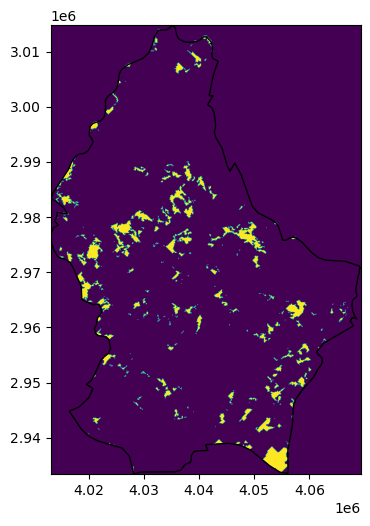

In [73]:
# One excluder will hold all exclusions together. Logic from above will be used (comments removed for clean code)
excluder = ExclusionContainer(crs=3035)

for constraint_nr, constraint in enumerate(constraints):
    if constraint_nr <2:
        gdf = gpd.read_file(constraint)
        excluder.add_geometry(gdf)
    elif constraint_nr ==2:
        gdf = gpd.read_file(constraint)
        excluder.add_geometry(gdf, buffer = 5000)
    elif constraint_nr ==3:
        gdf = gpd.read_file(constraint)
        excluder.add_geometry(gdf, buffer = 300)
    elif constraint_nr == 4:
        clc = rasterio.open(constraint)
        # Assuming the 1200 buffer zone (for constraint Nr 5) is not already included in the Dataset
        excluder.add_raster(clc, codes = codes1, invert=False, buffer = 1200)
    elif constraint_nr == 5:
        clc = rasterio.open(constraint)
        excluder.add_raster(clc, codes = codes2, invert = True)
    
    
band, transform = shape_availability(shape, excluder)
fig, ax = plt.subplots(figsize=(4,8))
shape.plot(ax=ax,  color='none')
show(band, transform=transform, ax=ax)
eligible_cells = band.sum()
cell_area = excluder.res**2
eligible_area = float(cell_area)*float(eligible_cells) #negative?!
print("Eligible area is:",eligible_area, "which is about", round(eligible_area/lu_area[0],5)*100, "% of Luxemburg")



### Task f Why does the sum of individual exclusion constraints (1.-6.) not add up to the total area excluded?

In [74]:
print("The sum of the individual exlcusion constraints might overlapp and therefore is \
not equal to the sum of single exclusions. For example: Street, airport and city exclusion might be all the same area\
and therefore shall not be excluded twice. ")

The sum of the individual exlcusion constraints might overlapp and therefore is not equal to the sum of single exclusions. For example: Street, airport and city exclusion might be all the same areaand therefore shall not be excluded twice. 


### Task g: Perform a sensitivity analysis on the distance criterion to CORINE land classes by repeating the land eligibility calculation with distance requirements of 0m, 200m, 400m, 600m, 800m and 1000m. Plot the available area as a function of the distance requirements and describe the curve. Make sure to label your figure appropriately.

Eligible area is: 2349660000.0 which is about 90.078 % of Luxemburg
Eligible area is: 1947340000.0 which is about 74.655 % of Luxemburg
Eligible area is: 1699620000.0 which is about 65.158 % of Luxemburg
Eligible area is: 1459740000.0 which is about 55.962 % of Luxemburg
Eligible area is: 1231320000.0 which is about 47.205000000000005 % of Luxemburg
Eligible area is: 1019270000.0 which is about 39.074999999999996 % of Luxemburg


area  eligible_part
distance                             
0         2.349660e+09         90.078
200       1.947340e+09         74.655
400       1.699620e+09         65.158
600       1.459740e+09         55.962
800       1.231320e+09         47.205
1000      1.019270e+09         39.075

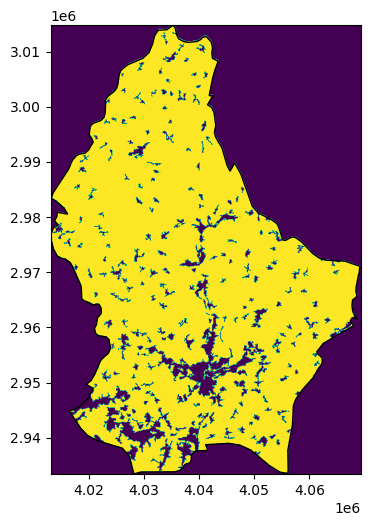

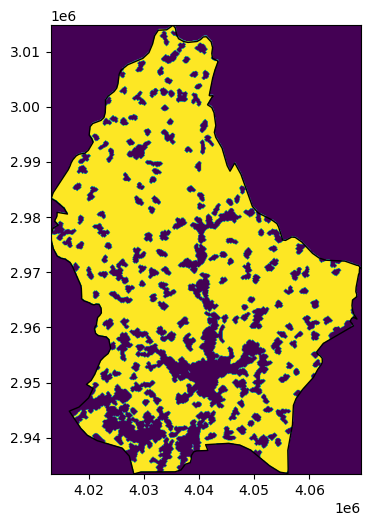

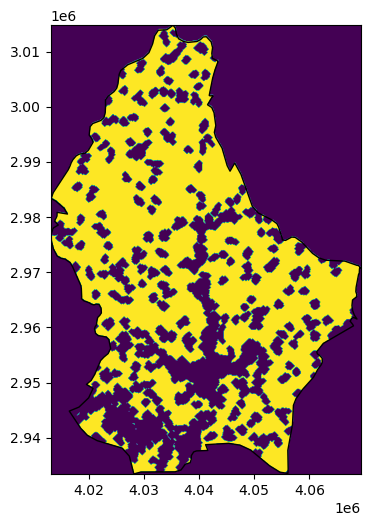

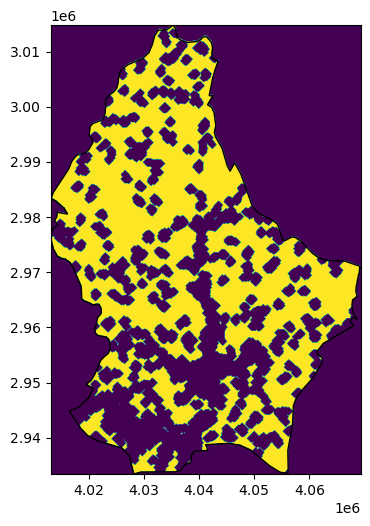

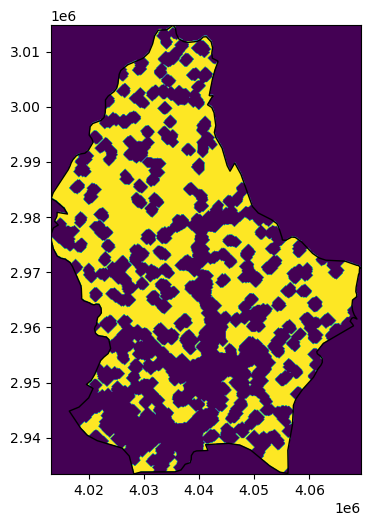

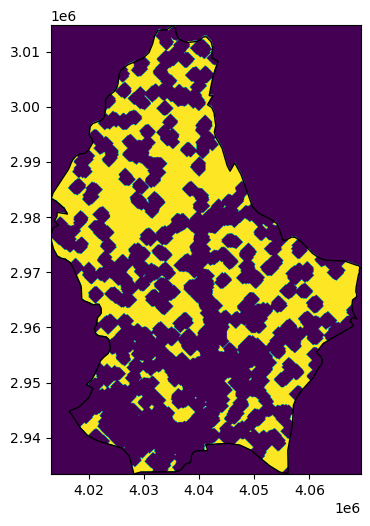

In [75]:
# Distances for sensitivity analysis, adding delta every iteration:
distance = 0
delta_d = 200

# Dataframe to information lateron:
df_dis = pd.DataFrame({"distance":[],
                      "area":[],
                      "eligible_part":[]})
df_dis = df_dis.set_index("distance")
# Exclude area in a loop and add to Dataframe
while distance <= 1000:
    excluder = ExclusionContainer(crs=3035)    
    clc = rasterio.open(constraint)
    excluder.add_raster(clc, codes = codes1, invert=False, buffer = distance)
    
    band, transform = shape_availability(shape, excluder)
    fig, ax = plt.subplots(figsize=(4,8))
    shape.plot(ax=ax,  color='none')
    show(band, transform=transform, ax=ax)
    eligible_cells = band.sum()
    cell_area = excluder.res**2
    eligible_area = float(cell_area) * float(eligible_cells)
    print("Eligible area is:",eligible_area, "which is about", round(eligible_area/lu_area[0],5)*100, "% of Luxemburg")
    
    df_dis.loc[distance] = {"area":eligible_area,
                            "eligible_part":round(eligible_area/lu_area[0],5)*100}
    
    
    distance += delta_d

# I wanted to provide the Maps as well so please reffer to the next Cell for the plots of available area over distance
df_dis
    

<function matplotlib.pyplot.show(close=None, block=None)>

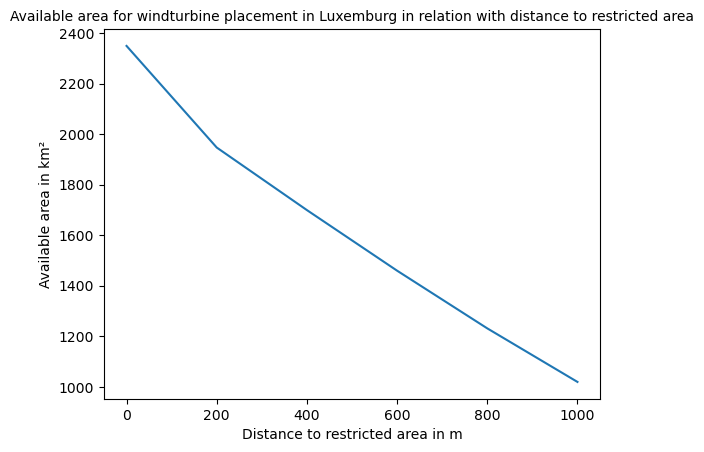

In [76]:
# Plotting available area over distance:
figure, ax = plt.subplots(1)
ax.plot(df_dis.index , df_dis.area/1e6)
ax.set_xlabel("Distance to restricted area in m")
ax.set_ylabel("Available area in km²")
ax.set_title("Available area for windturbine placement in Luxemburg in relation with distance to restricted area")
plt.show
# Increasing the distance that is to be kept to Wind turbines reduces the available area significantly. 
# The area is reduced almost in a straight manenr since the areas are not overlapping a lot for a 1000 meter buffer. 
# Increasing the buffer further would show asymthotic behaviour.


### Task h: Assume that for the expansion of wind power in Luxembourg, a capacity density of 2MW/km2 of available land can be achieved and that the wind conditions result in an average capacity factor of 33%. What is the total energy in units of TWh that could be produced from wind power in Luxembourg each year if the distance criterion were reduced to 800m?

In [77]:
# Calculating wind power after average capacity factor in TW:
res_power = 2*0.33*1/1e6

# Area in km² with distance criterion of 800m:
area = df_dis.loc[800, "area"]/1e6

# Hours per year (for non switch year):
h = 24*365

res_energy = float(res_power)*float(area)*float(h)
print("After installing 2MW/km² on eligble area the Wind energy production would be",res_energy,"TWh per year")

After installing 2MW/km² on eligble area the Wind energy production would be 7.118999712 TWh per year
